In [144]:
import json
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt

% matplotlib inline
% ignore warnings

UsageError: Line magic function `%` not found.


In [145]:
## working directory
path=("watch-later.json")

In [146]:
with open(path,'r',encoding='utf-8') as file:
    videos=json.load(file)


In [147]:
videos

[{'contentDetails': {'videoId': '0kqTgT4e1cU',
   'videoPublishedAt': '2016-10-05T11:30:01.000Z'},
  'etag': '"wdgS91PsEbtTfi20GmzFuZzYg2s/VKAASamsnbLwcIXLqj2zW9dd4CU"',
  'id': 'V0xKcjVjZ2ZLdGxwZW1CTXJGclRtOWd3LjYxMjg2NzZCMzVGNTUyOUY=',
  'kind': 'youtube#playlistItem',
  'snippet': {'channelId': 'UCJr5cgfKtlpemBMrFrTm9gw',
   'channelTitle': 'Sivakar Siva',
   'description': "Investing 101 FREE ebook: http://theminoritymindset.com/get-richer-sleeping-ebook/\nSUBSCRIBE for the latest videos *NEW VIDEOS EVERY WEEK* \nSC @M2JaspreetSingh\nhttp://www.TheMinorityMindset.com\n\nThe Minority Mindset has nothing to do with the way you look, your background, or ethnicity. It's a mindset. \n\nWhat Is The Minority Mindset? | Minority Mindset \nHi my name is Jaspreet Singh & welcome to the Minority Mindset \nOh what is the Minority Mindset? The minority mindset is a mindset that only a minority of people have.\n\nI’m Aman. It doesn’t matter what color, background, or race you are. Anyone can hav

In [148]:
videos[1]['snippet']

{'channelId': 'UCJr5cgfKtlpemBMrFrTm9gw',
 'channelTitle': 'Sivakar Siva',
 'description': 'A tanker truck carrying flammable material exploded Monday on a highway overpass near the northern Italian city of Bologna, killing at least two people and injuring up to 70 as it partially collapsed the raised roadway, police said.\nSubscribe to TIME ►► http://po.st/SubscribeTIME\n \nGet closer to the world of entertainment and celebrity news as TIME gives you access and insight on the people who make what you watch, read and share.\nhttps://www.youtube.com/playlist?list=PL2EFFA5DB900C633F\n \nMoney helps you learn how to spend and invest your money. Find advice and guidance you can count on from how to negotiate, how to save and everything in between.\nhttps://www.youtube.com/playlist?list=PLYOGLpQQfhNKdqS_Wccs94rMHiajrRr4W\n \nFind out more about the latest developments in science and technology as TIME’s access brings you to the ideas and people changing our world.\nhttps://www.youtube.com/p

In [149]:
# Getting the title and the description of all the videos

titles_original=[v['snippet']['title'] for v in videos]

for i,j in enumerate(titles_original[:5]):
    print('Number_{}|_Title: "{}!"'.format(i, j))

Number_0|_Title: "What Is The Minority Mindset? The Mindset Explained | Minority Mindset!"
Number_1|_Title: "Massive Truck Explosion Causes Partial Bridge Collapse In Italy | TIME!"
Number_2|_Title: "Inky Johnson -- "It's Not Just About You." (Motivational Video)!"
Number_3|_Title: "Tutte le Sigle di Dragon Ball!"
Number_4|_Title: "How To Install Linux Mint Alongside Windows | Get The Best of Both Worlds: Dual Boot!!"


In [151]:
Sum_titles=" ".join(titles_original)

In [152]:
Sum_titles

'What Is The Minority Mindset? The Mindset Explained | Minority Mindset Massive Truck Explosion Causes Partial Bridge Collapse In Italy | TIME Inky Johnson -- "It\'s Not Just About You." (Motivational Video) Tutte le Sigle di Dragon Ball How To Install Linux Mint Alongside Windows | Get The Best of Both Worlds: Dual Boot! Recursion (Think Like a Programmer) Goalcast\'s Top 10 Most Epic Inspirational Speeches  | Vol.2 John Legend - All of Me (Edited Video) Who are you, really? The puzzle of personality | Brian Little Poraada Poraada Video Song | Aranmanai 2 | Siddharth | Trisha | Hansika | Hiphop Tamizha Nenjinile Rebirth - Chris G. ft.  MC SAI & Sahi Siva | Official Video Song Everything You Need To Know About Toro Rosso | F1 Testing 2019 Neural Networks - The Math of Intelligence #4 How to GET STUFF DONE When You Don’t Feel Like It! Why Megalodon (Definitely) Went Extinct How to stop an unstable/wobbling washing machine | by Indesit Blue Whales 101 | Nat Geo Wild First order  Logic in

In [153]:
# Generate a word cloud image
stopwords=['http','https', 'www', 'com','music','song','video','videos','youtube','facebook','twitter','instagram']
stopwords+=list(ENGLISH_STOP_WORDS)

In [154]:
mask = np.array(Image.open("try.png"))

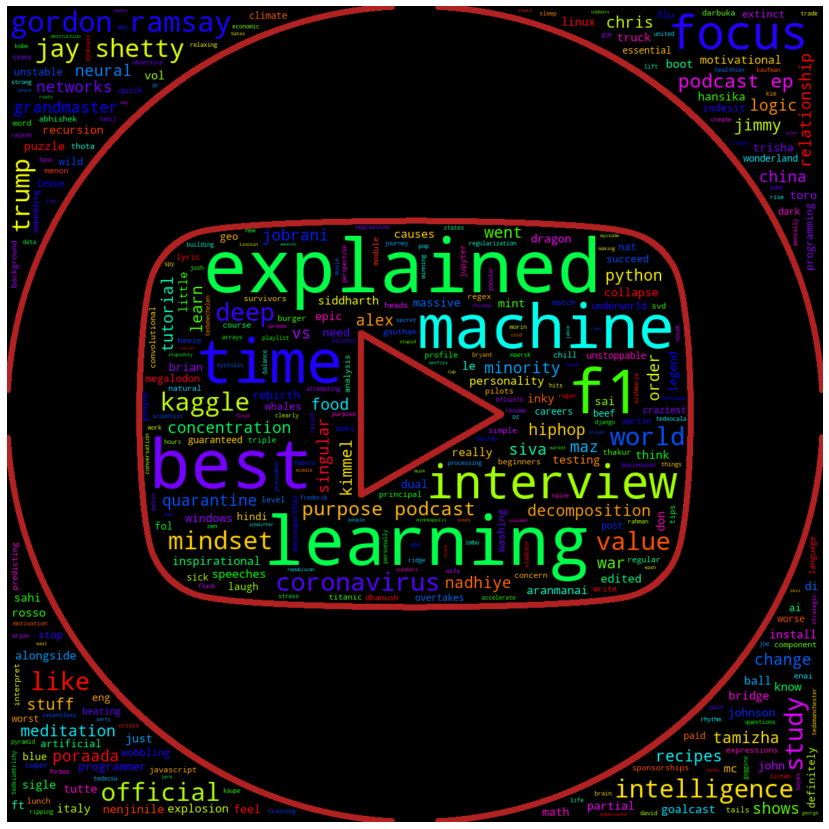

In [155]:
# Create a word cloud image
wc = WordCloud(background_color="black",stopwords=stopwords, max_words=1000, mask=mask, contour_width=15, contour_color='firebrick', margin=10,colormap='gist_rainbow')

# Generate a wordcloud
wc.generate(Sum_titles.lower())

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect= TfidfVectorizer(stop_words=stopwords)
X= vect.fit_transform(titles_original)
X.shape

(80, 382)

In [157]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA). 

In [158]:
from sklearn.decomposition import TruncatedSVD
output=TruncatedSVD(n_components=2)
output= output.fit_transform(X.todense())

In [159]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(output)

Text(0, 0.5, 'component_2')

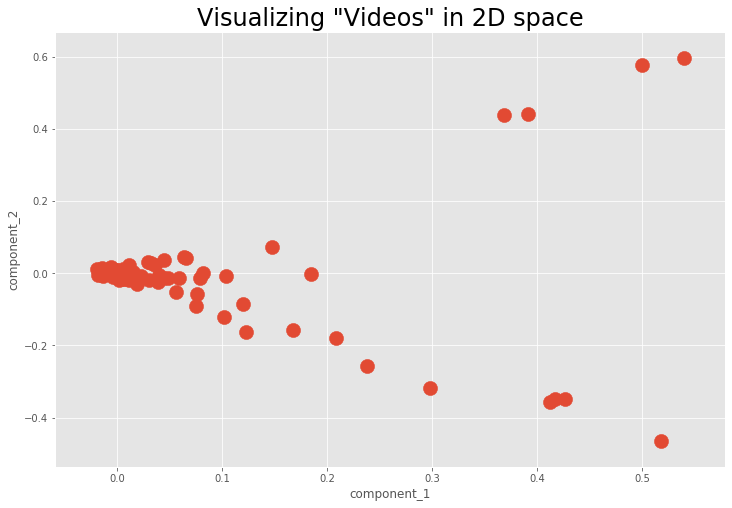

In [160]:
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.scatter(output[:, 0], output[:, 1],s=200, cmap='gist_rainbow', zorder=5)
plt.title('Visualizing "Videos" in 2D space', fontsize=24);
plt.xlabel('component_1')
plt.ylabel('component_2')

In [204]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    
    labels = kmeans.fit_predict(X)
    fig = plt.figure(figsize=(12,8))
    
    plt.style.use('ggplot')
    ax =  plt.gca()
    
    #ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=200, cmap='rainbow', zorder=10)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    
    plt.scatter(centers[:, 0], centers[:, 1],s=500, marker='*',c='yellow', zorder=10)
    
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#89ffff', lw=3, alpha=0.5, zorder=2))

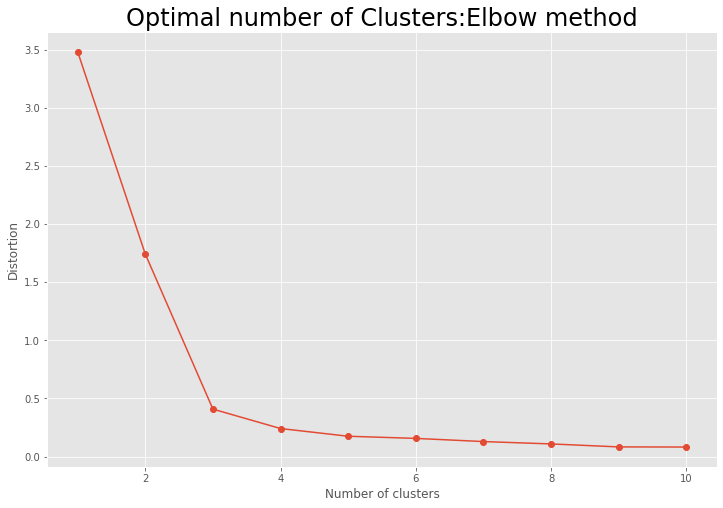

In [219]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    k_m = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,
                 tol=1e-04)
    k_m.fit(output)
    distortions.append(k_m.inertia_)

# plot
fig = plt.figure(figsize=(12,8))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Optimal number of Clusters:Elbow method', fontsize=24);
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

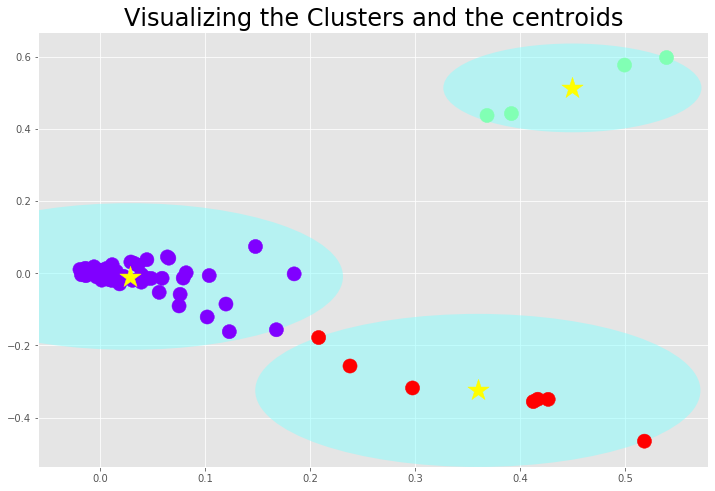

In [221]:
kmeans = KMeans(n_clusters=3, random_state=42)
plot_kmeans(kmeans, output)
plt.title('Visualizing the Clusters and the centroids', fontsize=24);

In [181]:
output.shape[0]

80

In [278]:
cluster_3=list(np.arange(output.shape[0])[output[:, 0] > 0.2])
cluster_1=list(np.arange(output.shape[0])[output[:, 1] > 0.4])
cluster_2=list(np.arange(output.shape[0])[output[:, 0] < 0.2])

In [279]:
cluster_1

[60, 61, 62, 64]

In [289]:
print(cluster_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79]


In [288]:
# printing cluster 2 videos
for i in cluster_2:
    print(titles_original[i])

What Is The Minority Mindset? The Mindset Explained | Minority Mindset
Massive Truck Explosion Causes Partial Bridge Collapse In Italy | TIME
Inky Johnson -- "It's Not Just About You." (Motivational Video)
Tutte le Sigle di Dragon Ball
How To Install Linux Mint Alongside Windows | Get The Best of Both Worlds: Dual Boot!
Recursion (Think Like a Programmer)
Goalcast's Top 10 Most Epic Inspirational Speeches  | Vol.2
John Legend - All of Me (Edited Video)
Who are you, really? The puzzle of personality | Brian Little
Poraada Poraada Video Song | Aranmanai 2 | Siddharth | Trisha | Hansika | Hiphop Tamizha
Nenjinile Rebirth - Chris G. ft.  MC SAI & Sahi Siva | Official Video Song
Everything You Need To Know About Toro Rosso | F1 Testing 2019
Neural Networks - The Math of Intelligence #4
How to GET STUFF DONE When You Don’t Feel Like It!
Why Megalodon (Definitely) Went Extinct
How to stop an unstable/wobbling washing machine | by Indesit
Blue Whales 101 | Nat Geo Wild
First order  Logic in Ar

In [277]:
cluster_3

[23, 24, 30, 31, 49, 60, 61, 62, 64, 70, 71]

In [274]:
for i in cluster_1:
    if i in cluster_3:
        cluster_3.remove(i)

In [270]:
cluster_3

[23, 24, 30, 31, 49, 70, 71]

In [262]:
for i in cluster_3:
    print(titles_original[i])

Top 10 Best F1 Overtakes of 2019
Top 10 Craziest Post-F1 Careers!
Gordon Ramsay's Quick & Simple Lunch Recipes
Gordon Ramsay's Top 10 Burger Tips
10 Businesses WINNING Because Of This 2020 Economic Crisis
GORDON RAMSAY LOSES IT! || Scheiffer Bates
Gordon Ramsay shows you how to wash your hands


In [271]:
for i in cluster_1:
    print(titles_original[i])

Jay Shetty Interviews His Wife For The First Time | On Purpose Podcast Ep. 1
This Conversation Will Change Your Perspective | ON Purpose Podcast Ep.3 Jay Shetty X Novak Djokovic
Jay Shetty & Kobe Bryant: ON How to be Strategic & Obsessive to Find Your Purpose
David Goggins: ON His Relationship With Pain | ON Purpose Podcast EP. 7
